In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [2]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
print(list(data.columns))
data.shape

['ITERATION', 'GPS_LAT', 'GPS_LON', 'GPS_ALT', 'HHsizemembers', 'LandCultivated', 'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold', 'PPI_Likelihood', 'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason', 'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr', 'crop_sales_USD_PPP_pHH_Yr', 'value_crop_consumed_USD_PPP_pHH_Yr', 'value_livestock_production_USD_PPP_pHH_Yr', 'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation', 'Livestock_Orientation', 'Food_Availability_kCal_MAE_day', 'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons', 'GHGEmissions', 'Gender_MaleControl', 'Gender_FemaleControl', 'NFertInput', 'Food_InsecurityLevel', 'sinBestFoodSecMonth', 'cosBestFoodSecMonth', 'sinWorstFoodSecMonth', 'cosWorstFoodSecMonth', 'Head_EducationLevel_<Other>', 'Head_EducationLevel_<

(35728, 90)

In [3]:
X = data.drop(['Food_InsecurityLevel'],axis=1)
y = data['Food_InsecurityLevel']
print(y)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new2 = scaler.fit_transform(X_new)
# X_new2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
fs_.fit(X_new, y)
mi_support = fs_.get_support()
X_new1 = fs_.transform(X_new)

# clf = ExtraTreesClassifier(n_estimators=60)
# clf = clf.fit(X, y)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new1 = model.transform(X_new)

# transformer = SelectFromModel(estimator=AdaBoostClassifier()).fit(X_new, y)
# X_new1 = transformer.transform(X_new)

# from keras.utils import to_categorical
# y = to_categorical(y)
# y = y[:,[1,2,3,4]]
print(X_new1.shape)
y.shape

0        3
1        4
2        4
3        2
4        4
        ..
35723    1
35724    1
35725    1
35726    1
35727    1
Name: Food_InsecurityLevel, Length: 35728, dtype: int32
(35728, 70)


(35728,)

In [4]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_new1, y, test_size=0.25, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=0)

In [5]:
print(len(X_train))
# print(len(X_val))
# print(len(X_test))
print(len(y_train))
# print(len(y_val))
# print(len(y_test))

# X_train

26796
26796


In [114]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

input_layer = Input(shape=(70,))
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_1 = Dropout(0.6)(hidden_layer1)
hidden_layer2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.6)(hidden_layer3)
hidden_layer4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.6)(hidden_layer4)
hidden_layer5 = Dense(128, activation='relu')(dropout_4)
output = Dense(5, activation='softmax')(dropout_3)
model = Model(inputs = input_layer, outputs = output)



# model = Sequential()
# model.add(Dense(300, input_dim=89, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [115]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 70)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               18176     
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0  

In [116]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test_val, y_test_val), epochs=100)

Train on 26796 samples, validate on 8932 samples
Epoch 1/100
26796/26796 [==============================] - 4s 132us/step - loss: 1.2017 - accuracy: 0.4723 - val_loss: 1.0500 - val_accuracy: 0.5433
Epoch 2/100
26796/26796 [==============================] - 3s 112us/step - loss: 1.0660 - accuracy: 0.5432 - val_loss: 0.9893 - val_accuracy: 0.5671
Epoch 3/100
26796/26796 [==============================] - 3s 109us/step - loss: 1.0306 - accuracy: 0.5578 - val_loss: 0.9722 - val_accuracy: 0.5825
Epoch 4/100
26796/26796 [==============================] - 3s 111us/step - loss: 1.0090 - accuracy: 0.5731 - val_loss: 0.9554 - val_accuracy: 0.6004
Epoch 5/100
26796/26796 [==============================] - 3s 109us/step - loss: 0.9906 - accuracy: 0.5850 - val_loss: 0.9464 - val_accuracy: 0.6055
Epoch 6/100
26796/26796 [==============================] - 3s 110us/step - loss: 0.9808 - accuracy: 0.5882 - val_loss: 0.9365 - val_accuracy: 0.6074
Epoch 7/100
26796/26796 [==============================] 

26796/26796 [==============================] - 3s 125us/step - loss: 0.8713 - accuracy: 0.6372 - val_loss: 0.8648 - val_accuracy: 0.6453
Epoch 56/100
26796/26796 [==============================] - 3s 125us/step - loss: 0.8685 - accuracy: 0.6404 - val_loss: 0.8648 - val_accuracy: 0.6399
Epoch 57/100
26796/26796 [==============================] - 3s 125us/step - loss: 0.8699 - accuracy: 0.6388 - val_loss: 0.8695 - val_accuracy: 0.6369
Epoch 58/100
26796/26796 [==============================] - 3s 126us/step - loss: 0.8652 - accuracy: 0.6396 - val_loss: 0.8652 - val_accuracy: 0.6406
Epoch 59/100
26796/26796 [==============================] - 3s 128us/step - loss: 0.8674 - accuracy: 0.6411 - val_loss: 0.8639 - val_accuracy: 0.6415
Epoch 60/100
26796/26796 [==============================] - 4s 137us/step - loss: 0.8657 - accuracy: 0.6404 - val_loss: 0.8617 - val_accuracy: 0.6431
Epoch 61/100
26796/26796 [==============================] - 4s 136us/step - loss: 0.8607 - accuracy: 0.6449 - val

Train: 0.701, Validation: 0.644


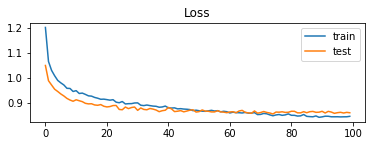

In [117]:
# model.predict(X_test_val)
# model.evaluate(X_test_val, y_test_val)


# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_val, y_test_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


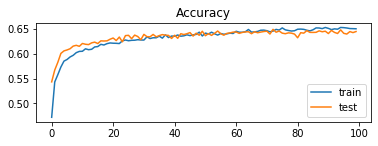

In [118]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()



In [119]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred_bool))

8932/8932 [==============================] - 0s 22us/step
              precision    recall  f1-score   support

           1       0.70      0.84      0.76      3019
           2       0.67      0.24      0.35      1403
           3       0.57      0.56      0.56      2264
           4       0.63      0.72      0.67      2246

    accuracy                           0.64      8932
   macro avg       0.64      0.59      0.59      8932
weighted avg       0.64      0.64      0.63      8932



In [100]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test_val)
# calculate accuracy
accuracy = accuracy_score(y_test_val, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.338


In [112]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=100, learning_rate='adaptive').fit(X_train, y_train)
score = classifier.score(X_test_val, y_test_val)
score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6307657859381998

In [113]:
y_pred = classifier.predict(X_test_val)

print(classification_report(y_test_val, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74      3019
           2       0.50      0.41      0.45      1403
           3       0.57      0.55      0.56      2264
           4       0.64      0.66      0.65      2246

    accuracy                           0.63      8932
   macro avg       0.60      0.60      0.60      8932
weighted avg       0.62      0.63      0.63      8932



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier().fit(X_train, y_train)
score1 = classifier1.score(X_test_val, y_test_val)
print(score1)

y_pred1 = classifier1.predict(X_test_val)

print(classification_report(y_test_val, y_pred1))

In [ ]:

classifier2 = ExtraTreesClassifier().fit(X_train, y_train)
score2 = classifier2.score(X_test_val, y_test_val)
print(score1)

y_pred2 = classifier2.predict(X_test_val)

print(classification_report(y_test_val, y_pred2))